<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

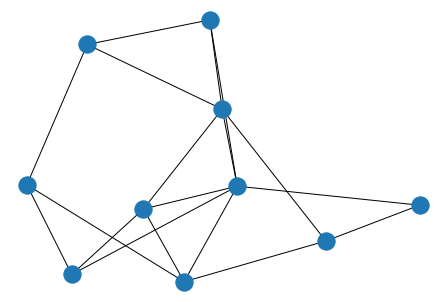

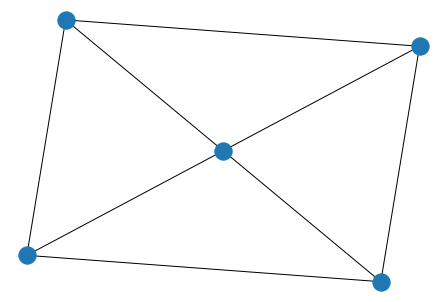

In [1]:
#Erdos-Renyi Graph in Networkx
import random
from networkx import nx
import matplotlib.pyplot as plt

N = 10  # 10 nodes
K = 100  # 100 agents
#M = 30  # 30 edges
NN = 5


#Graph = nx.gnm_random_graph(N, M)

P = 0.4 #Probabibilty for Node Connection in random graph
PP = 0.7
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 1 0 0 1 1 0 1 1]
 [1 0 0 1 0 0 0 0 1 0]
 [1 0 0 1 1 0 0 0 1 0]
 [0 1 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 1 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 1 1 1]
 [0 0 0 1 0 0 1 0 0 1]
 [1 1 1 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 1 0 0]]
[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 1]
 [1 1 0 1 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
print(Node)
print(len(Node))


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: []}
50


In [4]:
#Adding Virus_presence Randomly
for i in range(N):
  for j in range(NN):
    Virus_presence=random.uniform(0,1)
    Node[i*NN+j].append(Virus_presence)
print(Node)
print(len(Node))


{0: [0.1708869176456823], 1: [0.015360436920544451], 2: [0.24004667358843113], 3: [0.7114526294170616], 4: [0.03279252665316079], 5: [0.328193488598018], 6: [0.8365111762144581], 7: [0.4662285488661605], 8: [0.4303539216105703], 9: [0.3793293677375219], 10: [0.736356291925849], 11: [0.4888047098140571], 12: [0.4862027888953523], 13: [0.03172645516233874], 14: [0.9832315037603115], 15: [0.6479338407010892], 16: [0.43870282521808557], 17: [0.15142965211801518], 18: [0.21769137567988917], 19: [0.06463622456080931], 20: [0.2301595655695512], 21: [0.7864098810402265], 22: [0.1288825070404217], 23: [0.9708513073546048], 24: [0.4268107041785303], 25: [0.5980643990798012], 26: [0.6487612450833596], 27: [0.5700428644187798], 28: [0.7694196846589197], 29: [0.7490409027886106], 30: [0.31992709825907306], 31: [0.01078760358061115], 32: [0.21447941677327909], 33: [0.024599459526448708], 34: [0.5250314821469059], 35: [0.40203675263388206], 36: [0.7880590188641393], 37: [0.5244251234324816], 38: [0.9

In [5]:
#Initailizing randomly infection state [0 shows Recovered, 1 shows Susceptible, and 2 shows Infected]
for k in range(K):
  rand_node=random.randint(0,N-1)
  rand_nodeN=random.randint(0,NN-1)
  rand_state=random.randint(0,2)
  Node[rand_node*NN+rand_nodeN].append(rand_state)
print(Node)

{0: [0.1708869176456823, 2, 1, 0, 0, 1], 1: [0.015360436920544451, 1, 2], 2: [0.24004667358843113, 1, 1, 1, 0], 3: [0.7114526294170616, 2, 2], 4: [0.03279252665316079, 0], 5: [0.328193488598018, 0, 1], 6: [0.8365111762144581, 1], 7: [0.4662285488661605], 8: [0.4303539216105703, 1, 2], 9: [0.3793293677375219, 2, 1, 1, 0, 0], 10: [0.736356291925849, 1, 1], 11: [0.4888047098140571, 2, 0, 2], 12: [0.4862027888953523, 1, 2, 2], 13: [0.03172645516233874, 2], 14: [0.9832315037603115], 15: [0.6479338407010892, 0, 2], 16: [0.43870282521808557, 2], 17: [0.15142965211801518], 18: [0.21769137567988917, 2], 19: [0.06463622456080931, 0, 0, 1], 20: [0.2301595655695512, 1, 1, 1, 2], 21: [0.7864098810402265, 1], 22: [0.1288825070404217, 2, 1], 23: [0.9708513073546048, 0], 24: [0.4268107041785303, 1, 0, 2], 25: [0.5980643990798012, 1, 0, 0], 26: [0.6487612450833596, 1, 2, 0], 27: [0.5700428644187798, 1], 28: [0.7694196846589197, 2], 29: [0.7490409027886106, 2], 30: [0.31992709825907306, 1], 31: [0.01078

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

10
5


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append(Node[i*len(GraphN.nodes)+j][0])
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(1,len(Node[i*len(GraphN.nodes)+j]))):
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = list(Graph.neighbors(i))
                  neighborsn = list(GraphN.neighbors(j))
                  neighbors.append(i) #including no movement case
                  neighborsn.append(j)
                  possible_moves=neighbors 
                  possible_movesn=neighborsn
                  if len(possible_moves) > 0:
                      next = random.choice(possible_moves)
                  if len(possible_movesn) > 0:                     
                      nextn = random.choice(possible_movesn)
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(Node[cur][agent])
          curr_walk.append(nex)
          #print(curr_walk)
          walks.append(nex)
    return Node,Node_next

In [8]:
Node_n=Node.copy() 
for i in range(10):
  Node_p,Node_n = random_walk(Graph,GraphN,Node_n,1,1) 
  count=0
  for i in range(len(Node_p)):
    count+=len(Node_p[i]) - 1
  print(count)
  print(Node_p)
  print(Node_n)


100
{0: [0.1708869176456823, 2, 1, 0, 0, 1], 1: [0.015360436920544451, 1, 2], 2: [0.24004667358843113, 1, 1, 1, 0], 3: [0.7114526294170616, 2, 2], 4: [0.03279252665316079, 0], 5: [0.328193488598018, 0, 1], 6: [0.8365111762144581, 1], 7: [0.4662285488661605], 8: [0.4303539216105703, 1, 2], 9: [0.3793293677375219, 2, 1, 1, 0, 0], 10: [0.736356291925849, 1, 1], 11: [0.4888047098140571, 2, 0, 2], 12: [0.4862027888953523, 1, 2, 2], 13: [0.03172645516233874, 2], 14: [0.9832315037603115], 15: [0.6479338407010892, 0, 2], 16: [0.43870282521808557, 2], 17: [0.15142965211801518], 18: [0.21769137567988917, 2], 19: [0.06463622456080931, 0, 0, 1], 20: [0.2301595655695512, 1, 1, 1, 2], 21: [0.7864098810402265, 1], 22: [0.1288825070404217, 2, 1], 23: [0.9708513073546048, 0], 24: [0.4268107041785303, 1, 0, 2], 25: [0.5980643990798012, 1, 0, 0], 26: [0.6487612450833596, 1, 2, 0], 27: [0.5700428644187798, 1], 28: [0.7694196846589197, 2], 29: [0.7490409027886106, 2], 30: [0.31992709825907306, 1], 31: [0.0